# 网格世界强化学习Demo

演示值迭代和策略迭代算法在2x2网格世界中的应用


In [1]:
import numpy as np
from grid_world import GridWorld
from value_iteration import ValueIteration
from policy_iteration import PolicyIteration
from visualize import visualize_grid_world, print_results
import matplotlib.pyplot as plt

In [2]:
env = GridWorld()
print(f"  状态数: {env.n_states}")
print(f"  终端状态: {env.state_names[env.terminal_state]}")

  状态数: 4
  终端状态: s4



正在生成环境可视化...


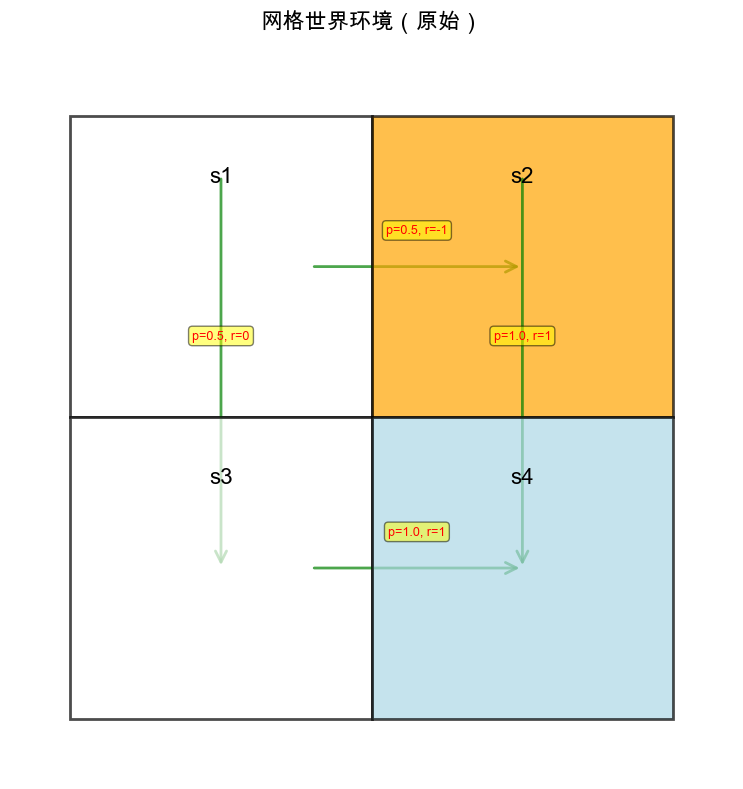

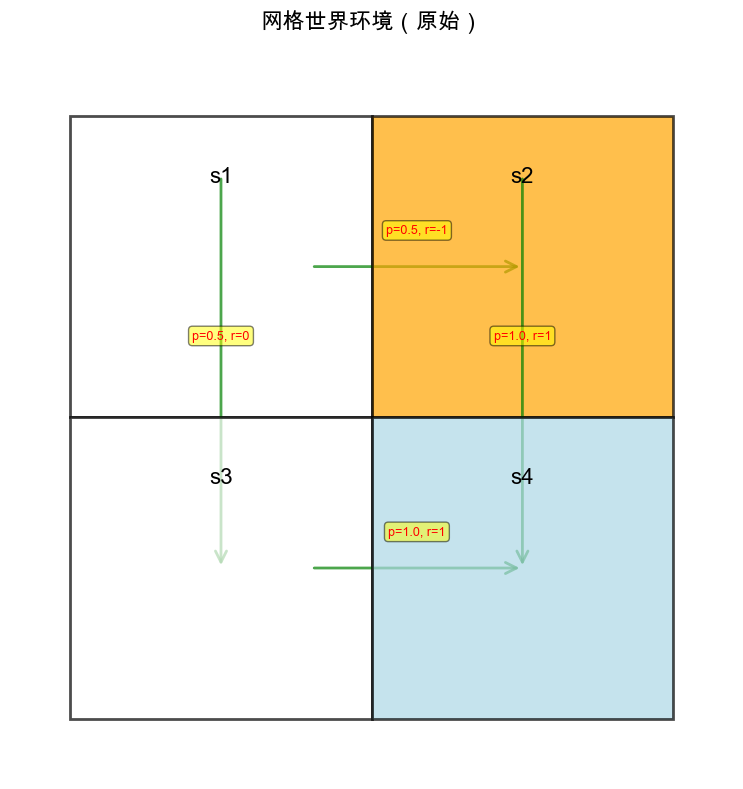

In [3]:
print("\n正在生成环境可视化...")
fig1, _ = visualize_grid_world(env, title="网格世界环境（原始）")
fig1

In [ ]:
vi = ValueIteration(env, gamma=0.9, theta=1e-6)
vi_results = vi.solve(max_iterations=1000)

print(f"\n收敛迭代次数: {vi_results['iterations']}")
print_results(env, vi_results["V"], vi_results["policy"], "值迭代")


收敛迭代次数: 3

值迭代 结果

值函数:
  s1: V = 0.450000
  s2: V = 1.000000
  s3: V = 1.000000
  s4: V = 0.000000

最优策略:
  s1: 下
  s2: 下
  s3: 右
  s4: 终端状态（无动作）



正在生成值迭代结果可视化...
  已保存: value_iteration_result.png


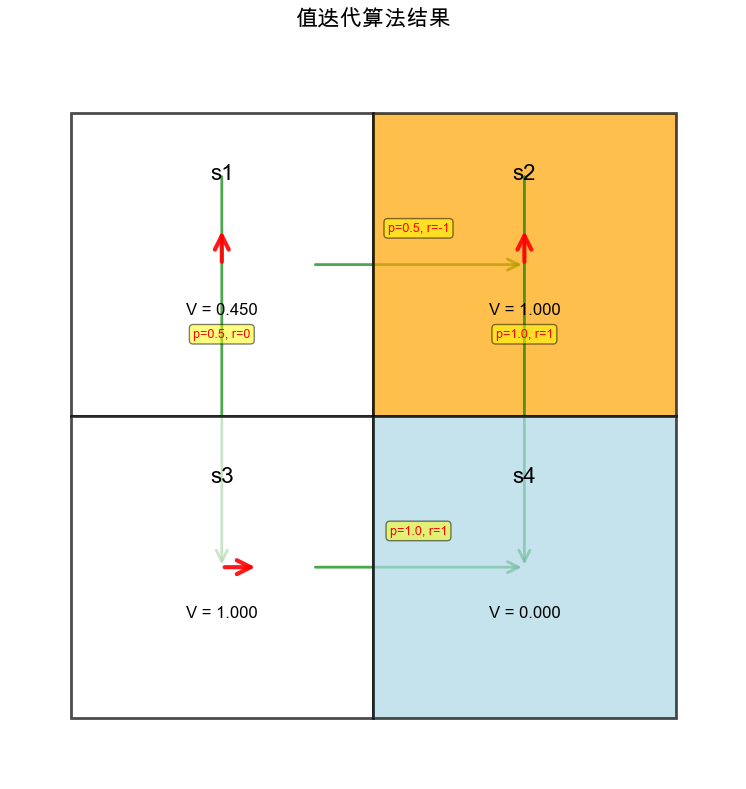

In [ ]:
# 可视化值迭代结果
print("\n正在生成值迭代结果可视化...")
fig2, _ = visualize_grid_world(
    env, V=vi_results["V"], policy=vi_results["policy"], title="值迭代算法结果"
)
plt.savefig("value_iteration_result.png", dpi=150, bbox_inches="tight")
print("  已保存: value_iteration_result.png")
plt.show()

## 5. 策略迭代算法


In [ ]:
print("\n" + "=" * 60)
print("运行策略迭代算法...")
print("=" * 60)
pi = PolicyIteration(env, gamma=0.9, theta=1e-6)
pi_results = pi.solve(max_iterations=100)

print(f"\n收敛迭代次数: {pi_results['iterations']}")
print_results(env, pi_results["V"], pi_results["policy"], "策略迭代")


### 5.1 可视化策略迭代结果


In [ ]:
# 可视化策略迭代结果
print("\n正在生成策略迭代结果可视化...")
fig3, _ = visualize_grid_world(
    env, V=pi_results["V"], policy=pi_results["policy"], title="策略迭代算法结果"
)
plt.savefig("policy_iteration_result.png", dpi=150, bbox_inches="tight")
print("  已保存: policy_iteration_result.png")
plt.show()


## 6. 算法比较


In [ ]:
# 比较两种算法的结果
print("\n" + "=" * 60)
print("算法比较")
print("=" * 60)
print("\n值函数比较:")
for state in range(env.n_states):
    state_name = env.get_state_name(state)
    vi_value = vi_results["V"][state]
    pi_value = pi_results["V"][state]
    diff = abs(vi_value - pi_value)
    print(f"  {state_name}: VI={vi_value:.6f}, PI={pi_value:.6f}, 差异={diff:.6f}")

print("\n策略比较:")
action_names = {0: "上", 1: "右", 2: "下", 3: "左"}
for state in range(env.n_states):
    state_name = env.get_state_name(state)
    if env.is_terminal(state):
        continue
    vi_action = vi_results["policy"].get(state)
    pi_action = pi_results["policy"].get(state)
    vi_name = action_names.get(vi_action, "无") if vi_action is not None else "无"
    pi_name = action_names.get(pi_action, "无") if pi_action is not None else "无"
    match = "✓" if vi_action == pi_action else "✗"
    print(f"  {state_name}: VI={vi_name}, PI={pi_name} {match}")
